In [1]:
# Import Packages #
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

from mlxtend.plotting import plot_decision_regions
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
from collections import Counter
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)
sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [2]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

In [5]:
# Read Data from csv #
df = pd.read_csv('corona.csv')

/Users/jayz/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# View Data#
df.head(500)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other
...,...,...,...,...,...,...,...,...,...,...
495,2020-04-30,0,0,0,0,0,negative,None,male,Other
496,2020-04-30,0,0,0,0,0,negative,None,female,Other
497,2020-04-30,0,0,0,0,0,negative,None,male,Other
498,2020-04-30,0,0,0,0,0,negative,None,female,Other


In [7]:
# Check Size & Features #
df.shape

(278848, 10)

In [8]:
# Check missing values #
df.isnull().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [10]:
# short summary about the data#
df.describe()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
count,278848,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,51,5,5,5,5,5,3,3,3,3
top,2020-04-20,0,0,0,0,0,negative,None,female,Other
freq,10921,121649,133942,260664,261079,260079,260227,127320,130158,242741


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   test_date            278848 non-null  object
 1   cough                278848 non-null  object
 2   fever                278848 non-null  object
 3   sore_throat          278848 non-null  object
 4   shortness_of_breath  278848 non-null  object
 5   head_ache            278848 non-null  object
 6   corona_result        278848 non-null  object
 7   age_60_and_above     278848 non-null  object
 8   gender               278848 non-null  object
 9   test_indication      278848 non-null  object
dtypes: object(10)
memory usage: 21.3+ MB


In [13]:
# checking what's wrong with the data - messy data #

for i in df.columns:
    print("\nColumn Name:",i,"-->",df[i].unique(),"-->Unique Count",len(df[i].unique()))


Column Name: test_date --> ['2020-04-30' '2020-04-29' '2020-04-28' '2020-04-27' '2020-04-26'
 '2020-04-25' '2020-04-24' '2020-04-23' '2020-04-22' '2020-04-21'
 '2020-04-20' '2020-04-19' '2020-04-18' '2020-04-17' '2020-04-16'
 '2020-04-15' '2020-04-14' '2020-04-13' '2020-04-12' '2020-04-11'
 '2020-04-10' '2020-04-09' '2020-04-08' '2020-04-07' '2020-04-06'
 '2020-04-05' '2020-04-04' '2020-04-03' '2020-04-02' '2020-04-01'
 '2020-03-31' '2020-03-30' '2020-03-29' '2020-03-28' '2020-03-27'
 '2020-03-26' '2020-03-25' '2020-03-24' '2020-03-23' '2020-03-22'
 '2020-03-21' '2020-03-20' '2020-03-19' '2020-03-18' '2020-03-17'
 '2020-03-16' '2020-03-15' '2020-03-14' '2020-03-13' '2020-03-12'
 '2020-03-11'] -->Unique Count 51

Column Name: cough --> [0 1 '0' '1' 'None'] -->Unique Count 5

Column Name: fever --> [0 1 '0' '1' 'None'] -->Unique Count 5

Column Name: sore_throat --> [0 1 '0' '1' 'None'] -->Unique Count 5

Column Name: shortness_of_breath --> [0 1 '0' '1' 'None'] -->Unique Count 5

Colum

In [14]:
# Data Cleaning #
df = df[df['corona_result'] != 'other'] 
df = df[df['cough'] != 'None'] 
df = df[df['fever'] != 'None'] 
df = df[df['sore_throat'] != 'None'] 
df = df[df['shortness_of_breath'] != 'None'] 
df = df[df['head_ache'] != 'None'] 

df.shape

(274702, 10)

In [15]:
# More Cleaning #
df['Cough']=np.where((df['cough'] == 1) | 
                       (df['cough'] == '1') 
                       , 1, 0)
df['Fever']=np.where((df['fever'] == 1) | 
                       (df['fever'] == '1') 
                       , 1, 0)
df['Sore_Throat']=np.where((df['sore_throat'] == 1) | 
                       (df['sore_throat'] == '1') 
                       , 1, 0)
df['Shortness_of_Breath']=np.where((df['shortness_of_breath'] == 1) | 
                       (df['shortness_of_breath'] == '1') 
                       , 1, 0)
df['Headache']=np.where((df['head_ache'] == 1) | 
                       (df['head_ache'] == '1') 
                       , 1, 0)
df['Test_Positive']=np.where((df['corona_result'] == 'positive') 
                       , 1, 0)
df['Gender_Male']=np.where((df['gender'] == 'male')  
                       , 1, 0)
df['Gender_Female']=np.where((df['gender'] == 'female')  
                       , 1, 0)
df['Gender_Unknown']=np.where((df['gender'] == 'None')  
                       , 1, 0)
df['Contacted']=np.where((df['test_indication'] == 'Contact with confirmed')  
                       , 1, 0)
df['Above_60']=np.where((df['age_60_and_above'] == 'Yes')  
                       , 1, 0)
df['Below_60']=np.where((df['age_60_and_above'] == 'No')  
                       , 1, 0)
df['Age_Unknown']=np.where((df['age_60_and_above'] == 'None')  
                       , 1, 0)
df.drop("test_date",axis=1,inplace=True)

In [16]:
# check cleaned data#

df.head(100)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,Cough,...,Shortness_of_Breath,Headache,Test_Positive,Gender_Male,Gender_Female,Gender_Unknown,Contacted,Above_60,Below_60,Age_Unknown
0,0,0,0,0,0,negative,None,female,Other,0,...,0,0,0,0,1,0,0,0,0,1
1,1,0,0,0,0,negative,None,female,Other,1,...,0,0,0,0,1,0,0,0,0,1
2,0,1,0,0,0,negative,None,male,Other,0,...,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,negative,None,female,Other,1,...,0,0,0,0,1,0,0,0,0,1
4,1,0,0,0,0,negative,None,male,Other,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0,0,0,0,0,negative,None,male,Other,0,...,0,0,0,1,0,0,0,0,0,1
97,1,1,0,0,0,negative,None,female,Other,1,...,0,0,0,0,1,0,0,0,0,1
98,0,0,0,0,0,negative,None,female,Other,0,...,0,0,0,0,1,0,0,0,0,1
99,0,0,0,0,0,negative,None,male,Other,0,...,0,0,0,1,0,0,0,0,0,1


In [17]:
# drop the old messy columns, since we have the cleaned version #

df.drop("cough",axis=1,inplace=True)
df.drop("fever",axis=1,inplace=True)
df.drop("sore_throat",axis=1,inplace=True)
df.drop("shortness_of_breath",axis=1,inplace=True)
df.drop("head_ache",axis=1,inplace=True)
df.drop("age_60_and_above",axis=1,inplace=True)
df.drop("gender",axis=1,inplace=True)
df.drop("test_indication",axis=1,inplace=True)

In [18]:
# Output to a CSV for tableau & future use- as milestone#
df.to_csv('covid_data.csv')

negative    0.946509
positive    0.053491
Name: corona_result, dtype: float64


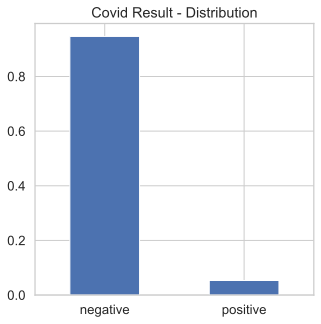

In [19]:
# Checking Data Balance - imbalanced#
target_pcts=df.corona_result.value_counts(normalize=True)
print(target_pcts)
plt.figure(figsize=(5, 5),dpi=800)
plt.title("Covid Result - Distribution")
target_pcts.plot(kind='bar');
plt.xticks(rotation=0)
plt.savefig('corona_result.png')

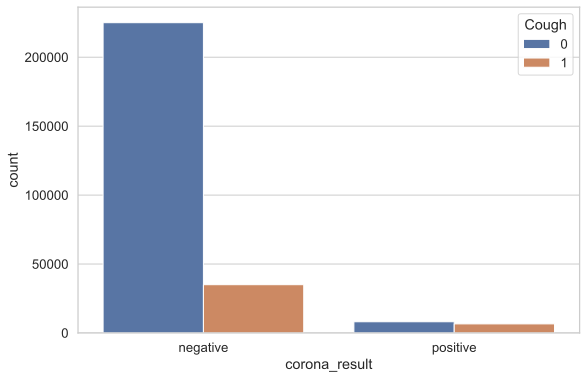

In [23]:
# check simple feature vs target #
sns.countplot(x='corona_result',hue='Cough',data=df);

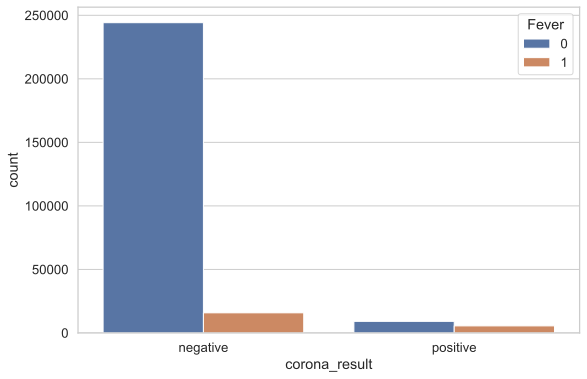

In [25]:
sns.countplot(x='corona_result',hue='Fever',data=df);

In [26]:
# Check Correlation #
cor=df.corr()
cor

,Cough,Fever,Sore_Throat,Shortness_of_Breath,Headache,Test_Positive,Gender_Male,Gender_Female,Gender_Unknown,Contacted,Above_60,Below_60,Age_Unknown
Cough,1.000000,0.453797,0.115613,0.106330,0.116730,0.196763,0.032681,-0.025265,-0.014532,0.196275,-0.007116,0.079345,-0.075102
Fever,0.453797,1.000000,0.122233,0.125840,0.169774,0.266633,0.032937,-0.033980,0.002087,0.180061,0.016315,0.043395,-0.052819
Sore_Throat,0.115613,0.122233,1.000000,0.195181,0.323343,0.278462,-0.016578,-0.006497,0.045318,0.180226,0.004504,0.050220,-0.052770
Shortness_of_Breath,0.106330,0.125840,0.195181,1.000000,0.202082,0.233417,-0.013875,-0.021330,0.069153,0.138045,0.024065,0.027094,-0.041044
Headache,0.116730,0.169774,0.323343,0.202082,1.000000,0.367324,-0.002297,-0.006315,0.016917,0.228591,0.008610,0.072674,-0.077580
Test_Positive,0.196763,0.266633,0.278462,0.233417,0.367324,1.000000,0.022713,-0.027364,0.009165,0.570262,0.046860,0.085391,-0.112512
Gender_Male,0.032681,0.032937,-0.016578,-0.013875,-0.002297,0.022713,1.000000,-0.870398,-0.253482,0.003897,-0.016461,0.011183,-0.001600
Gender_Female,-0.025265,-0.033980,-0.006497,-0.021330,-0.006315,-0.027364,-0.870398,1.000000,-0.255638,-0.009563,0.018574,-0.047929,0.037068
Gender_Unknown,-0.014532,0.002087,0.045318,0.069153,0.016917,0.009165,-0.253482,-0.255638,1.000000,0.011138,-0.004170,0.072209,-0.069688
Contacted,0.196275,0.180061,0.180226,0.138045,0.228591,0.570262,0.003897,-0.009563,0.011138,1.000000,0.007035,0.081174,-0.085153


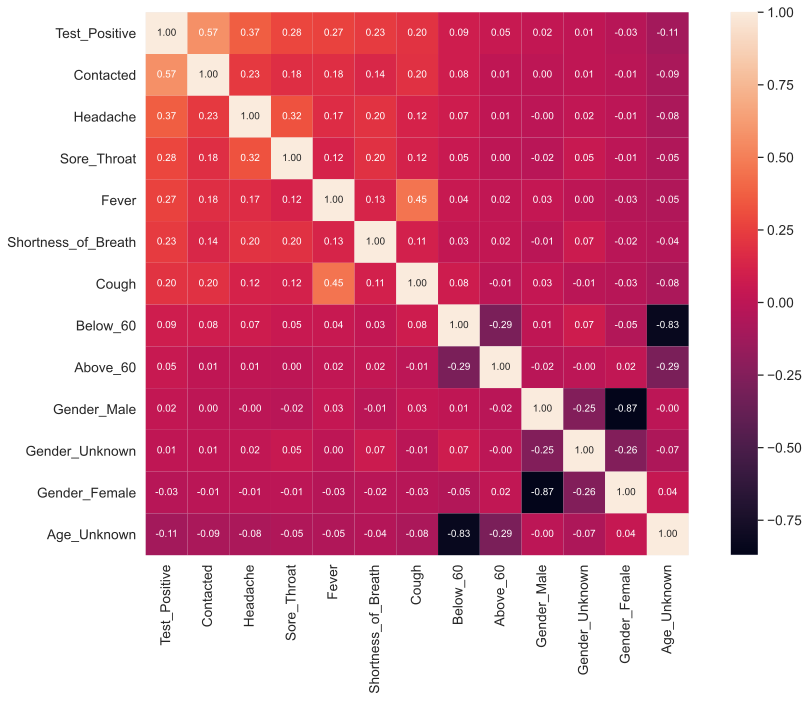

In [27]:
# Plot Correlation Heatmap #
from pylab import rcParams
plt.figure(figsize=(15, 10),dpi=80)
corrmat = df.corr()
k = 22
cols = corrmat.nlargest(k, 'Test_Positive')['Test_Positive'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
fig1 = plt.gcf()
plt.show()
fig1.savefig('heatmap.png')

In [28]:
# feature selection #
df.drop("Below_60",axis=1,inplace=True)
df.drop("Above_60",axis=1,inplace=True)
df.drop("Age_Unknown",axis=1,inplace=True)
df.drop("Gender_Male",axis=1,inplace=True)
df.drop("Gender_Unknown",axis=1,inplace=True)
df.drop("Gender_Female",axis=1,inplace=True)
df.drop("corona_result",axis=1,inplace=True)

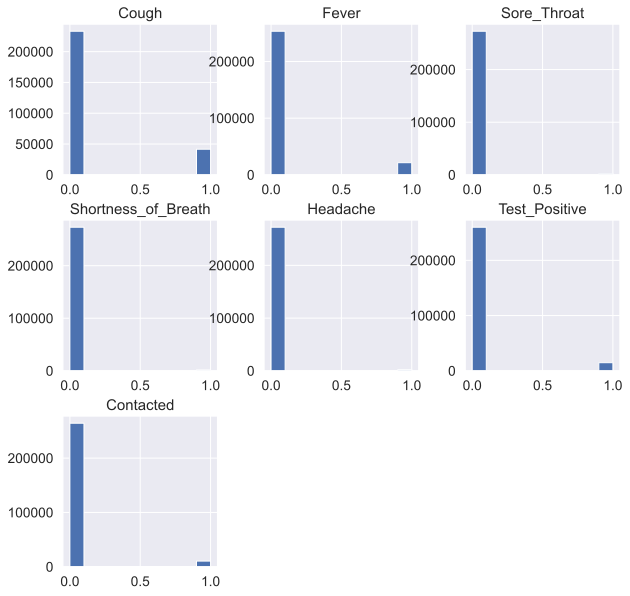

In [30]:
# Print distribution #
df.hist(figsize=(10,10));

In [32]:
# Split features and target #

X= df.drop(['Test_Positive'],axis=1)
y= df['Test_Positive']

In [34]:
### Train - Test Split##
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [35]:
## First Time Logistic Regression with imbalanced data##
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'lbfgs')
model.fit(X_train, y_train)
s=model.score(X_train,y_train)
s

0.9662132953526786

In [36]:
y_pred = model.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

accuracy_score1=accuracy_score(y_test,y_pred)

print("Accuracy for this model is:{:6.2f}%".format(100*accuracy_score1))
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f},   f1-score:{:6.4f}".format(precision_score(y_test, y_pred), 
                                                     recall_score(y_test, y_pred),f1_score(y_test, y_pred)))

Accuracy for this model is: 96.74%
Default threshold:
Precision: 0.7213,   Recall: 0.6152,   f1-score:0.6640


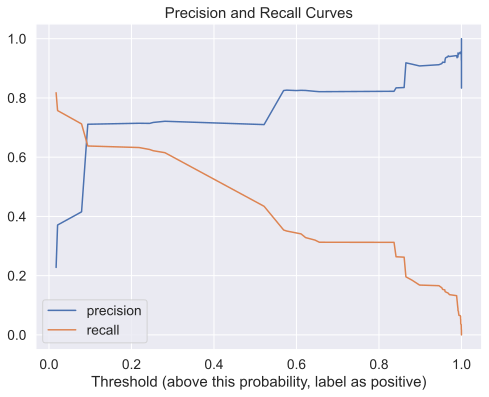

In [38]:
# precision vs. recall#

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1] )


plt.figure(figsize=(8, 6),dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as positive)');
plt.title('Precision and Recall Curves');

Text(85.40000000000005, 0.5, 'Actual')

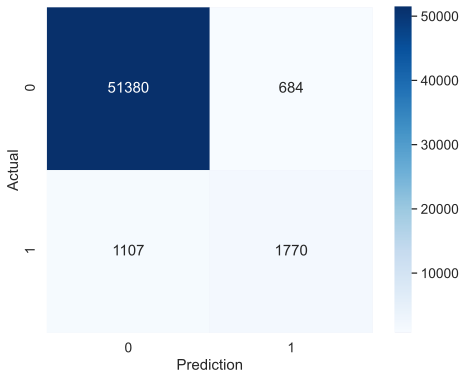

In [39]:
# bad model #

from sklearn.metrics import confusion_matrix
conf_m=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6),dpi=80)
sns.heatmap(conf_m,cmap=plt.cm.Blues,annot=True,square=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')

In [40]:
# using the new threshold of 0.1, still bad #
y_pred = (model.predict_proba(X_test)[:,1] > 0.1)
print("Threshold of 0.1:")
accuracy_score1=accuracy_score(y_test,y_pred)

print("Accuracy for this model is:{:6.2f}%".format(100*accuracy_score1))
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f},   f1-score:{:6.4f}".format(precision_score(y_test, y_pred), 
                                                     recall_score(y_test, y_pred),f1_score(y_test, y_pred)))

Threshold of 0.1:
Accuracy for this model is: 96.75%
Default threshold:
Precision: 0.7112,   Recall: 0.6378,   f1-score:0.6725


Text(85.40000000000005, 0.5, 'Actual')

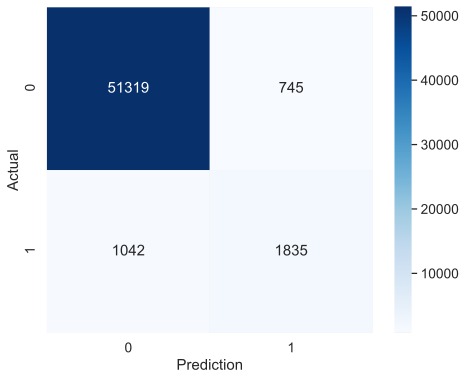

In [41]:
from sklearn.metrics import confusion_matrix
conf_m=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6),dpi=80)
sns.heatmap(conf_m,cmap=plt.cm.Blues,annot=True,square=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')

In [42]:
## Fix Imbalance Method 1: Under Sampling#
from imblearn.under_sampling import RandomUnderSampler
X_under, y_under = RandomUnderSampler(random_state=42).fit_sample(X,y)

In [43]:
Counter(y_under)

Counter({0: 14694, 1: 14694})

In [44]:
## Fix Imbalance Method 1: Synthetic Minority Over Sampling (SMOTE) #

from imblearn.over_sampling import SMOTE
X_smoted, y_smoted = SMOTE(random_state=42).fit_sample(X,y)

In [45]:
Counter(y_smoted)

Counter({0: 260008, 1: 260008})